In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')

In [3]:
santander = pd.read_csv("../data/santander-customer-satisfaction/train.csv")
santander.head()
santander.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
santander_test = pd.read_csv("../data/santander-customer-satisfaction/test.csv")

In [25]:
print(santander.describe())
santander.columns

                  ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [26]:
santander.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [7]:
santander['TARGET'].value_counts()

TARGET
0    73012
1     3008
Name: count, dtype: int64

In [5]:
santander['var3'].value_counts()
santander['var3'].replace(-999999, 0, inplace=True)

In [6]:
santander.drop('ID', axis=1, inplace=True)

In [31]:
# 데이터와 레이블 분리 
labels=santander['TARGET']
data = santander.drop('TARGET', axis=1)

In [32]:
print(f"데이터 구조: {data.shape}")

데이터 구조: (76020, 369)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=72)

In [ ]:
xgb_model = XGBClassifier(n_estimators=1000, n_jobs=-1, max_depth=6, random_state=72)

In [59]:
# 데이터 스케일링 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [64]:
y_train_over.value_counts()

TARGET
0    51121
1    51121
Name: count, dtype: int64

In [69]:
rf_san = RandomForestClassifier(n_estimators=1000, max_depth=5 , random_state=72, n_jobs=-1)
rf_san.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=5, n_estimators=1000, n_jobs=-1,
                       random_state=72)

In [78]:
predictions = rf_san.predict(X_test)
pred_proba = [1 if x > 0.3 else 0 for x in predictions]

print(predictions[:5])
print(pred_proba[:5])

[0 0 0 0 0]
[0, 0, 0, 0, 0]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1:{f1:.4f}, AUC:{roc_auc:.4f}')

In [79]:
get_clf_eval(y_test, predictions, pred_proba)

오차 행렬
[[16227  5664]
 [  367   548]]
정확도: 0.7356, 정밀도: 0.0882, 재현율: 0.5989, F1:0.1538, AUC:0.6701


In [80]:
# 조기 종료 => 검증 데이터 분리
X_tr, X_val, y_tr,y_val=train_test_split(
    X_train_over
    , y_train_over
    , test_size=0.3
    , random_state=0
)

In [81]:
xgb_san = XGBClassifier(
        n_estimators=1000
        , learning_rate=0.02
        , max_depth=5
        , eval_metric='auc'
        , random_state = 72
         ,early_stopping_rounds=100
        )

In [82]:
xgb_san.fit(X_tr, y_tr, eval_set=[(X_val, y_val)])

[0]	validation_0-auc:0.90691
[1]	validation_0-auc:0.90932
[2]	validation_0-auc:0.90917
[3]	validation_0-auc:0.91205
[4]	validation_0-auc:0.91226
[5]	validation_0-auc:0.91267
[6]	validation_0-auc:0.91450
[7]	validation_0-auc:0.91637
[8]	validation_0-auc:0.91584
[9]	validation_0-auc:0.91615
[10]	validation_0-auc:0.91649
[11]	validation_0-auc:0.91727
[12]	validation_0-auc:0.91800
[13]	validation_0-auc:0.91809
[14]	validation_0-auc:0.91881
[15]	validation_0-auc:0.91870
[16]	validation_0-auc:0.91938
[17]	validation_0-auc:0.91893
[18]	validation_0-auc:0.91901
[19]	validation_0-auc:0.91911
[20]	validation_0-auc:0.91931
[21]	validation_0-auc:0.91951
[22]	validation_0-auc:0.92183
[23]	validation_0-auc:0.92329
[24]	validation_0-auc:0.92397
[25]	validation_0-auc:0.92499
[26]	validation_0-auc:0.92578
[27]	validation_0-auc:0.92660
[28]	validation_0-auc:0.92732
[29]	validation_0-auc:0.92795
[30]	validation_0-auc:0.92842
[31]	validation_0-auc:0.92883
[32]	validation_0-auc:0.92921
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=72, ...)

In [83]:
xgb_san_score = roc_auc_score(y_test, xgb_san.predict_proba(X_test)[:,1])
print(f'ROC AUC score: {xgb_san_score:.4f}')

ROC AUC score: 0.7951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

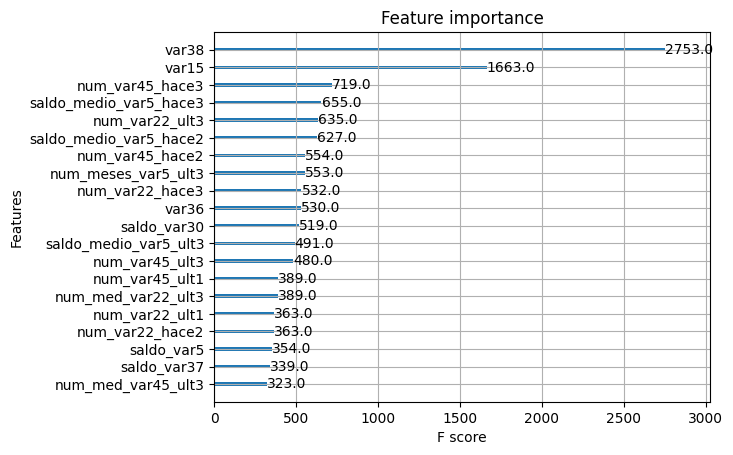

In [97]:
xgb.plot_importance(xgb_san, max_num_features=20)


In [103]:
# 중요도가 높은 피처만 추출
# 피쳐 중요도가 0.01 이상인 피처만 추출
importance=xgb_san.feature_importances_
feature_names = data.columns
df_importance = pd.DataFrame({'feature_names':feature_names, 'importance':importance})
df_importance = df_importance.sort_values(by='importance', ascending=False)

important_features = df_importance[df_importance['importance'] > 0.01]
important_columns = important_features['feature_names'].tolist()

In [104]:
print(important_columns)

['ind_var30', 'num_meses_var5_ult3', 'num_var42', 'num_var30_0', 'saldo_var30', 'imp_op_var39_efect_ult1', 'ind_var41_0', 'var15', 'ind_var5', 'num_op_var39_efect_ult1', 'ind_var37_0', 'num_var39_0', 'imp_op_var41_efect_ult3', 'num_ent_var16_ult1', 'imp_trans_var37_ult1', 'saldo_medio_var5_hace3', 'var36', 'saldo_medio_var5_ult3', 'saldo_var42', 'num_op_var41_efect_ult3', 'ind_var8_0', 'ind_var43_recib_ult1']


In [109]:
X_train_imp = X_train[important_columns]
Xtr, Xval, ytr, yval = train_test_split(X_train_imp
                                        , y_train
                                        , test_size=0.3
                                        , random_state=72)

In [110]:
xgb_san.fit(X_train_imp, y_train, eval_set=[(Xval, yval)])

[0]	validation_0-auc:0.82835
[1]	validation_0-auc:0.82918
[2]	validation_0-auc:0.82954
[3]	validation_0-auc:0.82955
[4]	validation_0-auc:0.82958
[5]	validation_0-auc:0.83076
[6]	validation_0-auc:0.83093
[7]	validation_0-auc:0.83116
[8]	validation_0-auc:0.83102
[9]	validation_0-auc:0.83128
[10]	validation_0-auc:0.83127
[11]	validation_0-auc:0.83214
[12]	validation_0-auc:0.83241
[13]	validation_0-auc:0.83248
[14]	validation_0-auc:0.83272
[15]	validation_0-auc:0.83307
[16]	validation_0-auc:0.83457
[17]	validation_0-auc:0.83463
[18]	validation_0-auc:0.83491
[19]	validation_0-auc:0.83560
[20]	validation_0-auc:0.83613
[21]	validation_0-auc:0.83640
[22]	validation_0-auc:0.83655
[23]	validation_0-auc:0.83699
[24]	validation_0-auc:0.83730
[25]	validation_0-auc:0.83733
[26]	validation_0-auc:0.83759
[27]	validation_0-auc:0.83781
[28]	validation_0-auc:0.83958
[29]	validation_0-auc:0.83977
[30]	validation_0-auc:0.84006
[31]	validation_0-auc:0.84015
[32]	validation_0-auc:0.83931
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=72, ...)

In [112]:
xgb_san_score = roc_auc_score(y_test, xgb_san.predict_proba(X_test[important_columns])[:,1])
print(f'ROC AUC score: {xgb_san_score:.4f}')

ROC AUC score: 0.8148


In [113]:
get_clf_eval(y_test, xgb_san.predict(X_test[important_columns]), xgb_san.predict_proba(X_test[important_columns])[:,1])

오차 행렬
[[21880    11]
 [  913     2]]
정확도: 0.9595, 정밀도: 0.1538, 재현율: 0.0022, F1:0.0043, AUC:0.8148


In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate']
                            , early_stopping_rounds=30
                            , eval_metric='auc'
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train): # X_train : 6만건
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1 * np.mean(roc_auc_list)

In [44]:
from hyperopt import hp, fmin, tpe, Trials
# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 10, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 2, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.8),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [45]:

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.83330	validation_1-auc:0.80543 
[1]	validation_0-auc:0.83941	validation_1-auc:0.81324 
[2]	validation_0-auc:0.84892	validation_1-auc:0.82280 
[3]	validation_0-auc:0.85021	validation_1-auc:0.82296 
[4]	validation_0-auc:0.85050	validation_1-auc:0.82398 
[5]	validation_0-auc:0.85002	validation_1-auc:0.82272 
[6]	validation_0-auc:0.85260	validation_1-auc:0.82504 
[7]	validation_0-auc:0.85003	validation_1-auc:0.82248 
[8]	validation_0-auc:0.85266	validation_1-auc:0.82564 
[9]	validation_0-auc:0.85677	validation_1-auc:0.82859 
[10]	validation_0-auc:0.85594	validation_1-auc:0.82741
[11]	validation_0-auc:0.85762	validation_1-auc:0.82951
[12]	validation_0-auc:0.85897	validation_1-auc:0.83085
[13]	validation_0-auc:0.86030	validation_1-auc:0.83093
[14]	validation_0-auc:0.86149	validation_1-auc:0.83078
[15]	validation_0-auc:0.86226	validation_1-auc:0.83078
[16]	validation_0-auc:0.86373	validation_1-auc:0.83164
[17]	validation_0-auc:0.86470	validation_1-auc:0.83136
[18]	valid

In [47]:
print(best)

{'colsample_bytree': np.float64(0.6917481934749554), 'learning_rate': np.float64(0.09366136665023655), 'max_depth': np.float64(5.0), 'min_child_weight': np.float64(5.0)}


In [119]:
xgb_san = XGBClassifier(n_estimators=1000, max_depth=int(best["max_depth"]), min_child_weight=best["min_child_weight"], colsample_bytree=best["colsample_bytree"]
                        , learning_rate=best['learning_rate'], eval_metric='auc', device='cuda')
xgb_san.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.6917481934749554), device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.09366136665023655), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=np.float64(5.0), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [1]:
get_clf_eval(y_test, xgb_san.predict(X_test), xgb_san.predict_proba(X_test)[:,1])

NameError: name 'get_clf_eval' is not defined

In [120]:
print(f'ROC AUC score: {xgb_san_score:.4f}')

ROC AUC score: 0.8148


In [117]:
lightgbm = lgb.LGBMClassifier(n_estimators=1000, max_depth=5, learning_rate=0.02, random_state=42)
lightgbm.fit(X_train_over, y_train_over)
lgbm_score = roc_auc_score(y_test, lightgbm.predict_proba(X_test)[:,1])

[LightGBM] [Info] Number of positive: 51121, number of negative: 51121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17731
[LightGBM] [Info] Number of data points in the train set: 102242, number of used features: 255
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [118]:
print(f'ROC AUC score: {lgbm_score:.4f}')

ROC AUC score: 0.7970
